In [1]:
import scipy.sparse
import scipy.linalg
import numpy as np
import mkprop
from exlaser import doublewellproblem as prob
import matplotlib.pyplot as plt

n=2000
L=5
Hamiltonian = prob(n,L)

x, nrm, inr = Hamiltonian.getprop()
#tend = 5.0
tend = 0.05
u = Hamiltonian.getinitialstate()

mv, dmv = Hamiltonian.setupHamiltonian(0)

In [2]:
np.set_printoptions(linewidth=180)
m=40
tol=1e-4

In [3]:
c = 3**0.5/6
cmat = [0.5-c, 0.5+c]
amat=[[0.25+c,0.25-c],[0.25-c,0.25+c]]
parth1 = [1,0]
parth2 = [0,1]

In [4]:
c = 3**0.5/6
cmat2 = [0.5-c, 0.5+c]
amat2 = [[0.25+c,0.25-c],[0.25-c,0.25+c]]
jexps2=len(amat2)

chat = -0.5
jexps=len(amat)
p=4

tnow = 0.522345
sig = 1j
tolkry=1e-8

y0=u
mv0, _ = Hamiltonian.setupHamiltonian(tnow)
ye0 = mv0(y0)
ye0 = ye0+0j

dts = np.geomspace(2e-1,2e-3,15)
errlistcfm4j2 = np.zeros(dts.size)
errestlistcfm4j2 = np.zeros(dts.size)
for dt, ij in zip(dts,range(len(dts))):
    print(ij)
    y0sub=u
    e0sub=-0.5*ye0
    for know in range(jexps):
        anow = amat[know]
        mv, dmv = Hamiltonian.setupHamiltonianCFM(anow,cmat,chat,tnow,dt)

        dHpsi = dmv(y0sub)
        Hpsi = mv(y0sub)
        HdHpsi = mv(dHpsi)
        dHHpsi = dmv(Hpsi)
        Gam11 = parth1[know]*Hpsi + dt/2*dHpsi - sig*dt**2/12*(HdHpsi-dHHpsi)
        e0sub += Gam11

        y1sub, errestkry, tkrylist, mlist1 = mkprop.expimv_pKry(mv,y0sub,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
        e1sub, errestkry, tkrylist, mlist2 = mkprop.expimv_pKry(mv,e0sub,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
        
        dHpsi = dmv(y1sub)
        Hpsi = mv(y1sub)
        HdHpsi = mv(dHpsi)
        dHHpsi = dmv(Hpsi)
        Gam12 = parth2[know]*Hpsi + dt/2*dHpsi + sig*dt**2/12*(HdHpsi-dHHpsi)
        e1sub += Gam12
        e0sub = e1sub
        y0sub = y1sub

    # computer error estimate
    y1 = y1sub
    mv2, _ = Hamiltonian.setupHamiltonian(tnow+dt)
    ye1 = mv2(y1)
    def1 = e1sub-0.5*ye1
    errestmag = dt/(p+1)*nrm(def1)
    errestlistcfm4j2[ij]=errestmag
    tolkry=1e-3*errestmag
    #print(errestmag)
    
    refsteps=4
    y0sub=u
    t=tnow
    dt2=dt/refsteps
    for j in range(refsteps):
        for know in range(jexps2):
            anow = amat2[know]
            mv, dmv = Hamiltonian.setupHamiltonianCFM(anow,cmat2,chat,t,dt2)
            y1sub, errestkry, tkrylist, mlist1 = mkprop.expimv_pKry(mv,y0sub,tol=tolkry,t=dt2,m=m,ktype=2,reo=0)
            y0sub = y1sub
        t+=dt2
    testerr = nrm(y1sub-y1)
    errlistcfm4j2[ij]=testerr
    #print(testerr)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [5]:
c = 15**0.5
cmat = [0.5-c/10, 0.5, 0.5+c/10]
#amat = [[0.302146842308616954258187683416,
#         -0.030742768872036394116279742324,
#         0.004851603407498684079562131338],
#        [-0.029220667938337860559972036973,
#         0.505929982188517232677003929089,
#         -0.029220667938337860559972036973],
#        [0.004851603407498684079562131337,
#         -0.030742768872036394116279742324,
#         0.302146842308616954258187683417]]

amat = [[37.0/240 + 10*c/3/87, -1.0/30, 37.0/240 - 10*c/3/87],
        [-11.0/360, 23.0/45, -11.0/360],
        [37.0/240 - 10*c/3/87, -1.0/30, 37.0/240 + 10*c/3/87]]

sa=0.5/sum(amat[0])
parth1 = [sa, 0.5, 1-sa]
parth2 = [1-sa, 0.5, sa]

In [6]:
#c=15**0.5
#cmat = [0.5-c/10, 0.5, 0.5+c/10]
#amat = [[0.79124225942889763, -0.080400755305553218, 0.012765293626634554],
#        [-0.48931475164583259, 0.054170980027798808,-0.012069823881924156],
#        [-0.029025638294289255, 0.50138457552775674,-0.025145341733509552],
#        [0.0048759082890019896,-0.030710355805557892,0.30222764976657693]]

In [7]:
c = 3**0.5/6
cmat2 = [0.5-c, 0.5+c]
amat2 = [[0.25+c,0.25-c],[0.25-c,0.25+c]]
jexps2=len(amat2)

chat = -0.5
jexps=len(amat)
p=4

tnow = 0.522345
sig = 1j
tolkry=1e-8

y0=u
mv0, _ = Hamiltonian.setupHamiltonian(tnow)
ye0 = mv0(y0)
ye0 = ye0+0j

errlistcfm = np.zeros(dts.size)
errestlistcfm1 = np.zeros(dts.size)
errestlistcfm2 = np.zeros(dts.size)
for dt, ij in zip(dts,range(len(dts))):
    print(ij)
    y0sub=u
    e0sub=-0.5*ye0
    for know in range(jexps):
        anow = amat[know]
        mv, dmv = Hamiltonian.setupHamiltonianCFM(anow,cmat,chat,tnow,dt)

        dHpsi = dmv(y0sub)
        Hpsi = mv(y0sub)
        HdHpsi = mv(dHpsi)
        dHHpsi = dmv(Hpsi)
        Gam11 = parth1[know]*Hpsi + dt/2*dHpsi - sig*dt**2/12*(HdHpsi-dHHpsi)
        e0sub += Gam11

        y1sub, errestkry, tkrylist, mlist1 = mkprop.expimv_pKry(mv,y0sub,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
        e1sub, errestkry, tkrylist, mlist2 = mkprop.expimv_pKry(mv,e0sub,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
        
        dHpsi = dmv(y1sub)
        Hpsi = mv(y1sub)
        HdHpsi = mv(dHpsi)
        dHHpsi = dmv(Hpsi)
        Gam12 = parth2[know]*Hpsi + dt/2*dHpsi + sig*dt**2/12*(HdHpsi-dHHpsi)
        e1sub += Gam12
        e0sub = e1sub
        y0sub = y1sub

    # computer error estimate
    y1 = y1sub
    mv2, _ = Hamiltonian.setupHamiltonian(tnow+dt)
    ye1 = mv2(y1)
    def1 = e1sub-0.5*ye1
    errestmag = dt/(p+1)*nrm(def1)
    errestlistcfm1[ij]=errestmag
    tolkry=1e-3*errestmag
    #print(errestmag)
    
    refsteps=4
    y0sub=u
    t=tnow
    dt2=dt/refsteps
    for j in range(refsteps):
        for know in range(jexps2):
            anow = amat2[know]
            mv, dmv = Hamiltonian.setupHamiltonianCFM(anow,cmat2,chat,t,dt2)
            y1sub, errestkry, tkrylist, mlist1 = mkprop.expimv_pKry(mv,y0sub,tol=tolkry,t=dt2,m=m,ktype=2,reo=0)
            y0sub = y1sub
        t+=dt2
    testerr = nrm(y1sub-y1)
    errlistcfm[ij]=testerr
    #print(testerr)
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


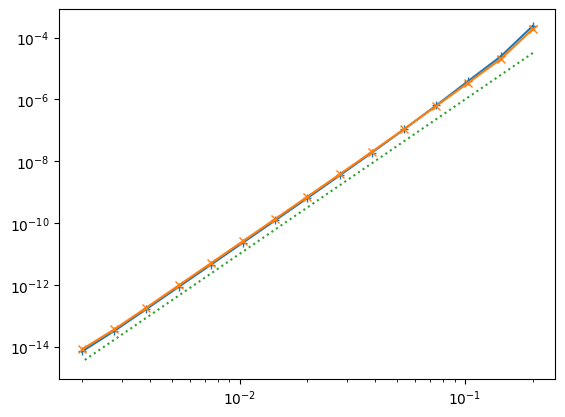

In [8]:
plt.loglog(dts, errestlistcfm1,'+-',dts,errlistcfm,'-x',dts,1e-1*dts**(p+1),':')

In [9]:
c = 3**0.5/6
cmat2 = [0.5-c, 0.5+c]
amat2 = [[0.25+c,0.25-c],[0.25-c,0.25+c]]
jexps=len(amat2)

chat = -0.5
jexps=len(amat)
p=2

tnow = 0.522345
sig = 1j
tolkry=1e-8

y0=u
mv0, _ = Hamiltonian.setupHamiltonian(tnow)
ye0 = mv0(y0)
ye0 = ye0+0j

errlist = np.zeros(dts.size)
errestlist1 = np.zeros(dts.size)
errestlist2 = np.zeros(dts.size)
for dt, ij in zip(dts,range(len(dts))):
    print(ij)

    y0=u
    mv, dmv = Hamiltonian.setupHamiltonian(tnow+0.5*dt)

    y1, errestkry, tkrylist, mlist = mkprop.expimv_pKry(mv,y0,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
    
    y0esym=mv(y0)-ye0
    defp2, errestkry, tkrylist, mlist = mkprop.expimv_pKry(mv,y0esym,tol=tolkry,t=dt,m=m,ktype=2,reo=0)
    # computer error estimate
    gam2 = mv(y1)
    mv2, _ = Hamiltonian.setupHamiltonian(tnow+dt)
    y1enext = mv2(y1)
    def1 = 0.5*(gam2-y1enext+defp2)
    errestmag = dt/(p+1)*nrm(def1)
    errestlist1[ij]=errestmag

    # computer error estimate 2
    dHpsi = dmv(y1)
    HdHpsi = mv(dHpsi)
    Hpsi = mv(y1)
    dHHpsi = dmv(Hpsi)
    defp1 = Hpsi + 0.5*dt*dHpsi + 0.5*sig*dt**2/2*(HdHpsi-dHHpsi)
    def1 = defp1-mv2(y1)
    errestmag = dt/(p+1)*nrm(def1)
    errestlist2[ij]=errestmag

    tolkry=1e-3*errestmag

    
    refsteps=4
    y0sub=u
    t=tnow
    dt2=dt/refsteps
    for j in range(refsteps):
        for know in range(jexps2):
            anow = amat2[know]
            mv, dmv = Hamiltonian.setupHamiltonianCFM(anow,cmat2,chat,t,dt2)
            y1sub, errestkry, tkrylist, mlist1 = mkprop.expimv_pKry(mv,y0sub,tol=tolkry,t=dt2,m=m,ktype=2,reo=0)
            y0sub = y1sub
        t+=dt2
    testerr = nrm(y1sub-y1)
    errlist[ij]=testerr
    #print(testerr)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


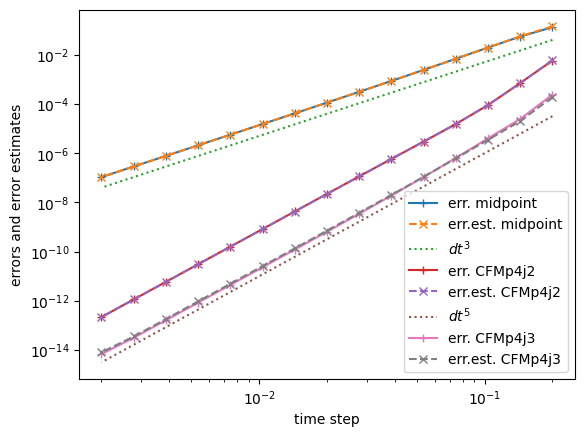

In [11]:
plt.loglog(dts, errestlist1,'+-',dts,errlist,'--x',dts,5e0*dts**(p+1),':')
plt.loglog(dts, errestlistcfm4j2,'+-',dts,errlistcfm4j2,'--x',dts,1e-1*dts**(5),':')
plt.loglog(dts, errestlistcfm1,'+-',dts,errlistcfm,'--x');
plt.xlabel('time step')
plt.ylabel('errors and error estimates')
plt.gca().legend(('err. midpoint','err.est. midpoint','$dt^3$','err. CFMp4j2','err.est. CFMp4j2','$dt^5$','err. CFMp4j3','err.est. CFMp4j3'))
plt.savefig("asymptoticerror.pdf", format="pdf", bbox_inches="tight")
plt.savefig("asymptoticerror.png")